In [2]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url, error_bad_lines=False)

In [5]:
# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Bd", "Bangladesh")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")
death['Country/Region']= death['Country/Region'].str.replace("Bd", "Bangladesh")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")
recover['Country/Region']= recover['Country/Region'].str.replace("Bd", "Bangladesh")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")
confirmed.iloc[10:22,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,15,15,15,17,19,21,22,26,27,28
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,625,656,689,743,781,835,873,900,907,921
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,287,299,305,337,367,367,396,407,407,411
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,62,66,66,69,69,72,74,80,82,86
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,685,769,821,917,968,1036,1085,1115,1135,1158
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,278,311,355,364,392,400,400,436,453,460
16,NaN,Austria,47.5162,14.5501,0,0,0,0,0,0,...,8271,8788,9618,10180,10711,11129,11524,11781,12051,12297
17,NaN,Azerbaijan,40.1431,47.5769,0,0,0,0,0,0,...,182,209,273,298,359,400,443,521,584,641
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,10,11,14,14,21,24,24,28,28,29
19,NaN,Bahrain,26.0275,50.5500,0,0,0,0,0,0,...,476,499,515,567,569,643,672,688,700,756


In [6]:
death.iloc[10:22,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1,2,2,2,2,4,4,4,4,4
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,0,0,0,1,2,2,2,2,2,2
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,3,4,4,4,4,5,7,8,8,10
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,3,4
16,NaN,Austria,47.5162,14.5501,0,0,0,0,0,0,...,68,86,108,128,146,158,168,186,204,220
17,NaN,Azerbaijan,40.1431,47.5769,0,0,0,0,0,0,...,4,4,4,5,5,5,5,5,7,7
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,0,0,0,0,1,1,1,4,4,5
19,NaN,Bahrain,26.0275,50.5500,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [7]:
population = pd.read_csv('data/population.csv', sep=',', encoding='latin1') 
confirmed = pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death = pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover = pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)

In [9]:
confirmed.iloc[10:22,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,Population,region
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,15,17,19,21,22,26,27,28,NaN,Australia_Northern Territory
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,689,743,781,835,873,900,907,921,"5,071,000",Australia_Queensland
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,305,337,367,367,396,407,407,411,"1,677,000",Australia_South Australia
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,66,69,69,72,74,80,82,86,NaN,Australia_Tasmania
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,821,917,968,1036,1085,1115,1135,1158,"92,141",Australia_Victoria
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,355,364,392,400,400,436,453,460,NaN,Australia_Western Australia
16,NaN,Austria,47.5162,14.5501,0,0,0,0,0,0,...,9618,10180,10711,11129,11524,11781,12051,12297,"8,822,000",Austria_nan
17,NaN,Azerbaijan,40.1431,47.5769,0,0,0,0,0,0,...,273,298,359,400,443,521,584,641,NaN,Azerbaijan_nan
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,14,14,21,24,24,28,28,29,NaN,Bahamas_nan
19,NaN,Bahrain,26.0275,50.5500,0,0,0,0,0,0,...,515,567,569,643,672,688,700,756,"1,493,000",Bahrain_nan


In [10]:
df_bd = confirmed[confirmed['Country/Region'] == 'Bangladesh']
df_bd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,Population,region
20,NaN,Bangladesh,23.685,90.3563,0,0,0,0,0,0,...,49,51,54,56,61,70,88,123,"164,690,000",Bangladesh_nan


In [11]:
df_bd_rec = recover[recover['Country/Region'] == 'Bangladesh']
df_bd_rec

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,Population,region
20,NaN,Bangladesh,23.685,90.3563,0,0,0,0,0,0,...,19,25,25,25,26,30,33,33,"164,690,000",Bangladesh_nan


In [12]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
ts_rec=create_ts(recover)
ts.tail()

region,Afghanistan_nan,Albania_nan,Algeria_nan,Andorra_nan,Angola_nan,Antigua and Barbuda_nan,Argentina_nan,Armenia_nan,Australia_Australian Capital Territory,Australia_New South Wales,...,United Kingdom_nan,United States_nan,Uruguay_nan,Uzbekistan_nan,Venezuela_nan,Vietnam_nan,West Bank and Gaza_nan,Western Sahara_nan,Zambia_nan,Zimbabwe_nan
4/2/20,273,277,986,428,8,9,1133,663,87,2298,...,33718,243453,350,205,146,233,161,0,39,9
4/3/20,281,304,1171,439,8,15,1265,736,91,2389,...,38168,275586,369,227,153,237,194,0,39,9
4/4/20,299,333,1251,466,10,15,1451,770,93,2493,...,41903,308850,400,266,155,240,217,0,39,9
4/5/20,349,361,1320,501,14,15,1451,822,96,2580,...,47806,337072,400,342,159,241,237,4,39,9
4/6/20,367,377,1423,525,16,15,1554,833,96,2637,...,51608,366614,406,457,165,245,254,4,39,10


Text(0.5, 1.0, 'Daily Total Recoverd - Major areas')

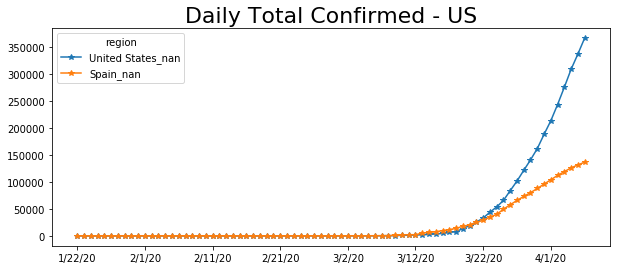

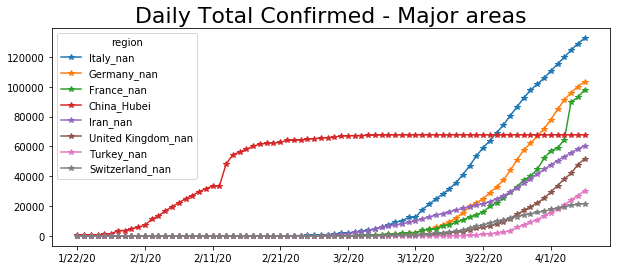

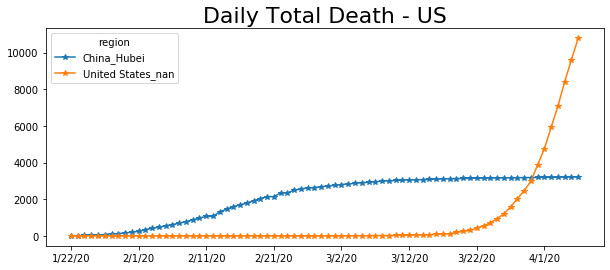

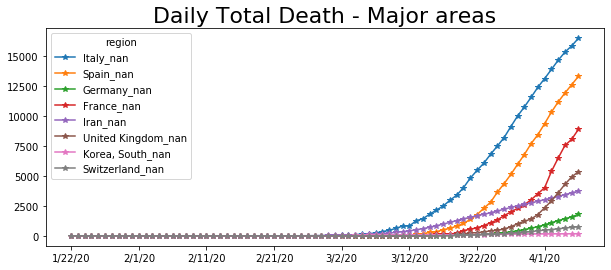

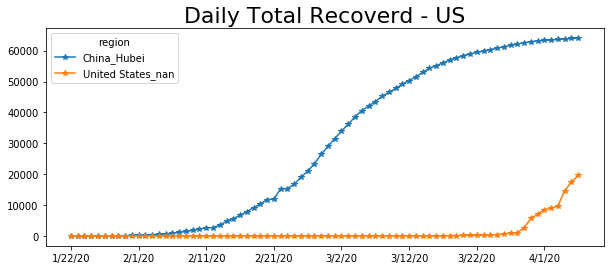

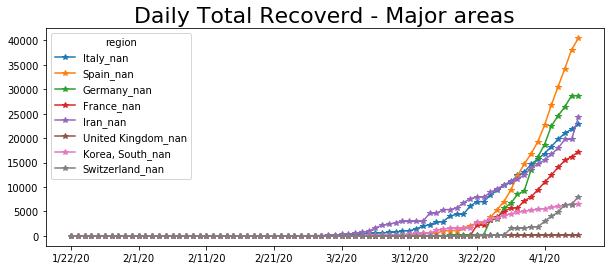

In [17]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - US',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - US',fontdict={'fontsize': 22})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:2].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - US',fontdict={'fontsize': 22})
p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})